<a href="https://colab.research.google.com/github/vankiee/ML_for_data_analysis/blob/main/LassoRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd 
from sklearn import metrics, datasets
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
from matplotlib import pyplot as plt

# Clean data

In [30]:
df = pd.read_csv('/content/gapminder.csv')

# change data type of all but 1st column
df[df.columns[1:]] = df.iloc[:, 1:].apply(pd.to_numeric, errors = 'coerce') 

# remove rows which are NaN in target column
dataset = df[df['lifeexpectancy'].notna()].reset_index(drop = True)
dataset.shape

(191, 16)

In [31]:
dataset.isnull().sum()

country                   0
incomeperperson          15
alcconsumption           15
armedforcesrate          27
breastcancerper100th     19
co2emissions              7
femaleemployrate         15
hivrate                  44
internetuserate          12
lifeexpectancy            0
oilperperson            129
polityscore              31
relectricperperson       57
suicideper100th          13
employrate               15
urbanrate                 3
dtype: int64

In [32]:
# remove columns with null values more than 80% of rows
thresh = len(dataset) * .8
dataset = dataset.dropna(thresh=thresh, axis=1)
dataset.shape

(191, 13)

In [33]:
dataset['lifeexpectancy'] = [1 if x >= 76.6 else 0 for x in dataset['lifeexpectancy']]

# Fit model

In [34]:
x = dataset[dataset.columns.drop(['country', 'lifeexpectancy'])]
y = dataset['lifeexpectancy']

train_ratio = .7
# since we're using GridSearchCV we don't need validation set
# validation_ratio = .15 
test_ratio = .3 

# train is 75% of dataset
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=1-train_ratio, 
                                                    random_state=123)

# test is 10% of initial dataset
# validation is 15% of initial dataset
#x_val, x_test, y_val, y_test = train_test_split(x_test, y_test,
#                                                test_size = test_ratio/(test_ratio + validation_ratio))

In [63]:
imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()
model = Lasso()

steps = [('imputer', imputer), 
         ('scaler', scaler),
         ('model', model)]
pipeline = Pipeline(steps=steps)

alphas = np.arange(0, 1, 0.01)

search = GridSearchCV(pipeline,
                      {'model__alpha': alphas},
                      cv=5,
                      return_train_score=True,
                      scoring='r2',
                      verbose=2)

In [66]:
search.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] model__alpha=0.0 ................................................
[CV] ................................. model__alpha=0.0, total=   0.0s
[CV] model__alpha=0.0 ................................................
[CV] ................................. model__alpha=0.0, total=   0.0s
[CV] model__alpha=0.0 ................................................
[CV] ................................. model__alpha=0.0, total=   0.0s
[CV] model__alpha=0.0 ................................................
[CV] ................................. model__alpha=0.0, total=   0.0s
[CV] model__alpha=0.0 ................................................
[CV] ................................. model__alpha=0.0, total=   0.0s
[CV] model__alpha=0.01 ...............................................
[CV] ................................ model__alpha=0.01, total=   0.0s
[CV] model__alpha=0.01 ...............................................
[CV] .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.6636580632894047, tolerance: 0.0019103773584905662
  positive)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: UserWarning: With alpha=0, this algorithm does not converge well. You

[CV] ................................ model__alpha=0.03, total=   0.0s
[CV] model__alpha=0.03 ...............................................
[CV] ................................ model__alpha=0.03, total=   0.0s
[CV] model__alpha=0.04 ...............................................
[CV] ................................ model__alpha=0.04, total=   0.0s
[CV] model__alpha=0.04 ...............................................
[CV] ................................ model__alpha=0.04, total=   0.0s
[CV] model__alpha=0.04 ...............................................
[CV] ................................ model__alpha=0.04, total=   0.0s
[CV] model__alpha=0.04 ...............................................
[CV] ................................ model__alpha=0.04, total=   0.0s
[CV] model__alpha=0.04 ...............................................
[CV] ................................ model__alpha=0.04, total=   0.0s
[CV] model__alpha=0.05 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    5.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('imputer',
                                        SimpleImputer(add_indicator=False,
                                                      copy=True,
                                                      fill_value=None,
                                                      missing_values=nan,
                                                      strategy='median',
                                                      verbose=0)),
                                       ('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        Lasso(alpha=1.0, copy_X=True,
                                              fit_intercept=True,

In [60]:
coefficients = search.best_estimator_.named_steps['model'].coef_
dict(zip(x.columns, coefficients))

{'alcconsumption': 0.0,
 'armedforcesrate': -0.0,
 'breastcancerper100th': 0.024424034679298386,
 'co2emissions': -0.0,
 'employrate': -0.0,
 'femaleemployrate': 0.0,
 'incomeperperson': 0.2433746257831445,
 'internetuserate': 0.04256525335703515,
 'polityscore': 0.04935028648251758,
 'suicideper100th': -0.0,
 'urbanrate': 0.0}

The most important parameters are


1.   incomeperperson
2.   polityscore
3.   internetuserate
4.   breastcancerper100th

The order of all except polityscore doesn't differ with the results of RandomForest.ipynb.



In [48]:
search.best_params_

{'model__alpha': 0.03}

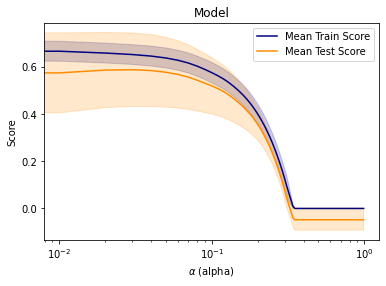

In [52]:
train_scores_mean = search.cv_results_["mean_train_score"]
train_scores_std = search.cv_results_["std_train_score"]
test_scores_mean = search.cv_results_["mean_test_score"]
test_scores_std = search.cv_results_["std_test_score"]

plt.figure()
plt.title('Model')
plt.xlabel('$\\alpha$ (alpha)')
plt.ylabel('Score')

# plot train scores
plt.semilogx(alphas, 
             train_scores_mean, 
             label='Mean Train Score', 
             color = 'navy')

# create shaded area between [mean-std, mean+std]
plt.gca().fill_between(alphas,
                       train_scores_mean - train_scores_std,
                       train_scores_mean + train_scores_std,
                       alpha=0.2, # for opacity
                       color='navy')

# plot test scores
plt.semilogx(alphas, 
             test_scores_mean,
             label='Mean Test Score',
             color='darkorange')

# create shaded area
plt.gca().fill_between(alphas,
                       test_scores_mean - test_scores_std,
                       test_scores_mean + test_scores_std,
                       alpha=0.2, # for opacity
                       color='darkorange')

plt.legend(loc='best')
plt.show()

It's clear why alpha=0.03 is the best because the gap between mean train and test scores appear smallest, and after that the scores of both are decreasing.

In [62]:
print('Best score: ', search.best_score_) 
best = search.best_estimator_
print('R2 test data: ', r2_score(y_pred = best.predict(x_test), y_true = y_test))

Best score:  0.5877515298060432
R2 test data:  0.44007442755318293


# Conclusion

Of 13 predictor variables, only 4 were retained in the selected model, and all were positively associated with life expectancy (not sure why breast cancer rate is included). Although the model did well on training set (R2 ~ 0.6), it did not perform as well on test data (R2 ~ 0.4)